In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
# Load datasets
device_prop = pd.read_csv('DeviceProperty.csv')
prod_metric = pd.read_csv('ProductionMetric.csv')
quality = pd.read_csv('Quality.csv')

In [3]:
# Check for missing values in all datasets
device_prop_missing = device_prop.isnull().sum()
prod_metric_missing = prod_metric.isnull().sum()
quality_missing = quality.isnull().sum()

# Display missing values for each dataset
print("Device Property Missing Values:\n", device_prop_missing)
print("\nProduction Metric Missing Values:\n", prod_metric_missing)
print("\nQuality Missing Values:\n", quality_missing)


Device Property Missing Values:
 deviceKey           0
Area                0
DefaultCycleTime    0
Enterprise          0
Line                0
Location            0
Operation           0
Plant               0
SubType             0
Type                0
dtype: int64

Production Metric Missing Values:
 prodmetric_stream_key                0
deviceKey                            0
start_time                           0
end_time                             0
good_count                           0
reject_count                         0
ideal_time                           0
run_time                             0
planned_stop_time                    0
unplanned_stop_time                  0
performance_impact_display_name      0
process_state_display_name           0
process_state_reason_display_name    0
job_display_name                     0
part_display_name                    0
shift_display_name                   0
team_display_name                    0
dtype: int64

Quality Missing Value

In [4]:
# Check for duplicates in each dataset
device_prop_duplicates = device_prop.duplicated().sum()
prod_metric_duplicates = prod_metric.duplicated().sum()
quality_duplicates = quality.duplicated().sum()

# Print the number of duplicates
print(f"Device Property Duplicates: {device_prop_duplicates}")
print(f"Production Metric Duplicates: {prod_metric_duplicates}")
print(f"Quality Duplicates: {quality_duplicates}")


Device Property Duplicates: 0
Production Metric Duplicates: 0
Quality Duplicates: 0


In [5]:
# data_df is the dataset which obtained from SQL code
BeerBo_df = pd.read_csv('data_df.csv')
BeerBo_df

,prodmetric_stream_key,production_device,start_time,end_time,good_count,production_reject_count,ideal_time,run_time,unplanned_stop_time,planned_stop_time,...,process_state_display_name,process_state_reason_display_name,job_display_name,part_display_name,shift_display_name,team_display_name,quality_stream_key,quality_device,quality_count,reject_reason_display_name
0,5552062,Line3,2025-01-29 19:10:14.3284760 -06:00,2025-01-29 19:13:19.6285480 -06:00,0,0,0.000000,0.000000,185.300072,0.0,...,Down,Security Alarm,Part D-4000,Part D,Second Shift,Team 2,NaN,NaN,NaN,NaN
1,5552060,Line3,2025-01-29 19:05:37.3369440 -06:00,2025-01-29 19:10:14.3284760 -06:00,96,0,157.363822,276.991532,0.000000,0.0,...,Running,Running Normally,Part D-4000,Part D,Second Shift,Team 2,NaN,NaN,NaN,NaN
2,5552046,Line4,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:02:07.0000000 -06:00,54,0,0.000000,0.000000,0.000000,0.0,...,Meal/Break,Lunch,Part J-4000,Part J,Second Shift,Team 3,NaN,NaN,NaN,NaN
3,5552048,Line2,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:34.0000000 -06:00,0,0,0.000000,0.000000,0.000000,0.0,...,Meal/Break,Lunch,Part M-3000,Part M,Second Shift,Team 3,NaN,NaN,NaN,NaN
4,5552049,Line1,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:52.0000000 -06:00,67,0,0.000000,0.000000,0.000000,0.0,...,Meal/Break,Lunch,Part P-2000,Part P,Second Shift,Team 2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13508,5420551,Line3,2025-01-17 11:26:05.5650680 -06:00,2025-01-17 11:29:11.4843000 -06:00,0,0,0.000000,0.000000,185.919232,0.0,...,Down,No Bottles,Part F-3000,Part F,First Shift,Team 1,NaN,NaN,NaN,NaN
13509,5420547,Line3,2025-01-17 11:19:12.1559110 -06:00,2025-01-17 11:26:05.5650680 -06:00,210,16,372.159850,413.409157,0.000000,0.0,...,Running,Running Normally,Part F-3000,Part F,First Shift,Team 1,1747748.0,Line 3,16.0,Cosmetic Defect
13510,5420543,Line3,2025-01-17 11:16:22.5533940 -06:00,2025-01-17 11:19:12.1559110 -06:00,0,0,0.000000,0.000000,169.602517,0.0,...,Down,Random Inspection,Part F-3000,Part F,First Shift,Team 1,NaN,NaN,NaN,NaN
13511,5420541,Line3,2025-01-17 11:15:00.0000000 -06:00,2025-01-17 11:16:22.5533940 -06:00,13,10,37.762533,82.553394,0.000000,0.0,...,Running,Running Normally,Part F-3000,Part F,First Shift,Team 1,1747744.0,Line 3,10.0,Out of Spec


In [6]:
# Check for outliers in 'run_time' column using IQR (Interquartile Range)
Q1 = BeerBo_df['run_time'].quantile(0.25)
Q3 = BeerBo_df['run_time'].quantile(0.75)
IQR = Q3 - Q1
outliers = BeerBo_df[(BeerBo_df['run_time'] < (Q1 - 1.5 * IQR)) | (BeerBo_df['run_time'] > (Q3 + 1.5 * IQR))]
print(f"Outliers in run_time:\n{outliers}")


Outliers in run_time:
       prodmetric_stream_key production_device  \
207                  5551498             Line3   
613                  5550180             Line3   
1387                 5547539             Line3   
1437                 5547384             Line1   
1438                 5547384             Line1   
...                      ...               ...   
11593                5425000             Line1   
11594                5425000             Line1   
11595                5425000             Line1   
12453                5423069             Line3   
12864                5422101             Line3   

                               start_time                            end_time  \
207    2025-01-29 15:05:56.9270180 -06:00  2025-01-29 15:49:23.0000000 -06:00   
613    2025-01-29 07:21:50.2509210 -06:00  2025-01-29 08:00:00.0000000 -06:00   
1387   2025-01-28 15:09:38.3523990 -06:00  2025-01-28 16:00:00.0000000 -06:00   
1437   2025-01-28 14:10:11.2897500 -06:00  2025-01-28

In [7]:
outliers_details = BeerBo_df.loc[outliers.index]
print(outliers_details[['production_device', 'start_time', 'end_time', 'run_time']])


      production_device                          start_time  \
207               Line3  2025-01-29 15:05:56.9270180 -06:00   
613               Line3  2025-01-29 07:21:50.2509210 -06:00   
1387              Line3  2025-01-28 15:09:38.3523990 -06:00   
1437              Line1  2025-01-28 14:10:11.2897500 -06:00   
1438              Line1  2025-01-28 14:10:11.2897500 -06:00   
...                 ...                                 ...   
11593             Line1  2025-01-18 23:17:23.6676380 -06:00   
11594             Line1  2025-01-18 23:17:23.6676380 -06:00   
11595             Line1  2025-01-18 23:17:23.6676380 -06:00   
12453             Line3  2025-01-18 07:06:48.8723100 -06:00   
12864             Line3  2025-01-17 23:06:03.6915560 -06:00   

                                 end_time     run_time  
207    2025-01-29 15:49:23.0000000 -06:00  2606.072982  
613    2025-01-29 08:00:00.0000000 -06:00  2289.749079  
1387   2025-01-28 16:00:00.0000000 -06:00  3021.647601  
1437   2025-01-

In [9]:
# Remove outliers
cleaned_prod_metric = BeerBo_df[BeerBo_df['run_time'] <= (Q3 + 1.5 * IQR)]


In [10]:
# Cap the run_time values at the 95th percentile
cap_value = BeerBo_df['run_time'].quantile(0.95)
BeerBo_df['run_time'] = np.where(BeerBo_df['run_time'] > cap_value, cap_value, BeerBo_df['run_time'])


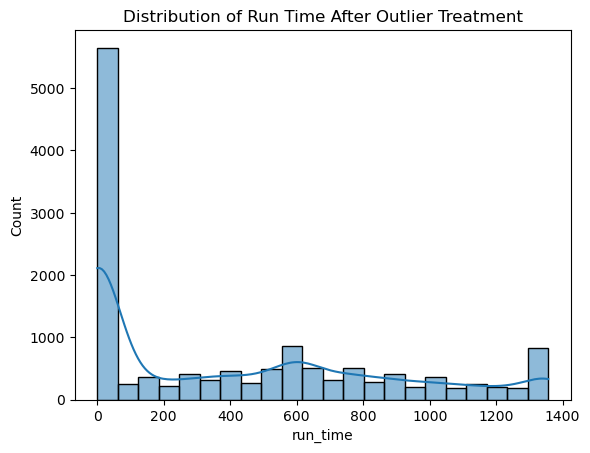

In [11]:
# Visualize the distribution of 'run_time' after removing or capping outliers
sns.histplot(BeerBo_df['run_time'], kde=True)
plt.title("Distribution of Run Time After Outlier Treatment")
plt.show()


In [12]:
BeerBo_df['log_run_time'] = np.log1p(BeerBo_df['run_time'])  # log(1 + x) to avoid log(0) issues


In [13]:
# Count zero or near-zero values
zero_counts = BeerBo_df[BeerBo_df['run_time'] <= 5].shape[0]
total_counts = BeerBo_df.shape[0]

print(f"Number of zero or near-zero values: {zero_counts}")
print(f"Percentage of zero or near-zero values: {zero_counts / total_counts * 100:.2f}%")


Number of zero or near-zero values: 5320
Percentage of zero or near-zero values: 39.37%


In [14]:
# Check zero run_time across different devices
zero_counts_by_device = BeerBo_df[BeerBo_df['run_time'] <= 5]['production_device'].value_counts()
print(zero_counts_by_device)

# Check zero run_time across different shifts
zero_counts_by_shift = BeerBo_df[BeerBo_df['run_time'] <= 5]['shift_display_name'].value_counts()
print(zero_counts_by_shift)


Line3    1662
Line4    1471
Line1    1431
Line2     756
Name: production_device, dtype: int64
Second Shift     1789
First Shift      1763
Third Shift      1694
No Shift           58
Unknown Shift      16
Name: shift_display_name, dtype: int64


In [15]:
# Check run_time stats for each line
BeerBo_df.groupby("production_device")["run_time"].describe()

,count,mean,std,min,25%,50%,75%,max
production_device,,,,,,,,
Line1,3906.0,473.515631,480.948579,0.0,0.0,393.612390,849.084863,1356.523612
Line2,2093.0,472.078629,465.763080,0.0,0.0,411.548368,842.666452,1356.523612
Line3,4269.0,379.805232,415.457282,0.0,0.0,264.402364,671.124610,1356.523612
Line4,3245.0,352.913002,423.046635,0.0,0.0,132.155562,627.959581,1356.523612


In [16]:
# Total runs per shift
total_counts_by_shift = BeerBo_df['shift_display_name'].value_counts()

# Compute zero percentage
zero_percentage_by_shift = (zero_counts_by_shift / total_counts_by_shift) * 100
print(zero_percentage_by_shift)


Second Shift      38.473118
First Shift       39.449541
Third Shift       39.212963
No Shift         100.000000
Unknown Shift    100.000000
Name: shift_display_name, dtype: float64


In [17]:
# Impute with median runtime
median_run_time = BeerBo_df[BeerBo_df["run_time"] > 5]["run_time"].median()
BeerBo_df.loc[BeerBo_df["run_time"] <= 5, "run_time"] = median_run_time


In [18]:
# Check number of missing shift values
print(BeerBo_df['shift_display_name'].isnull().sum())

# Check if 'No Shift' and 'Unknown Shift' only contain zero run times
no_shift_data = BeerBo_df[BeerBo_df['shift_display_name'].isin(['No Shift', 'Unknown Shift'])]
print(no_shift_data)
print(no_shift_data['run_time'].describe())


0
       prodmetric_stream_key production_device  \
224                  5551423             Line3   
233                  5551383             Line3   
636                  5550055             Line3   
641                  5550031             Line3   
998                  5549135             Line3   
...                      ...               ...   
12480                5423000             Line3   
12879                5429900             Line3   
12888                5422026             Line3   
13314                5421051             Line3   
13328                5421019             Line3   

                               start_time                            end_time  \
224    2025-01-29 15:00:00.0000000 -06:00  2025-01-29 15:05:37.3369440 -06:00   
233    2025-01-29 14:45:00.0000000 -06:00  2025-01-29 15:00:00.0000000 -06:00   
636    2025-01-29 07:00:00.0000000 -06:00  2025-01-29 07:05:57.7798350 -06:00   
641    2025-01-29 06:45:00.0000000 -06:00  2025-01-29 07:00:00.0000000 -0

In [19]:
BeerBo_df = BeerBo_df[~BeerBo_df['team_display_name'].isin(['Unknown Team', 'No Team'])]

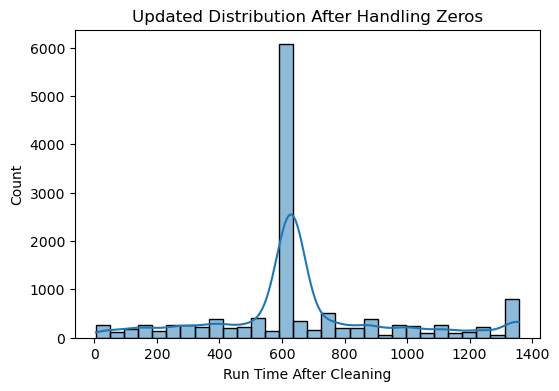

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(BeerBo_df["run_time"], bins=30, kde=True)
plt.xlabel("Run Time After Cleaning")
plt.title("Updated Distribution After Handling Zeros")
plt.show()


In [21]:
# Step 1: Total values
total_unplanned = BeerBo_df['unplanned_stop_time'].sum()
total_planned = BeerBo_df['planned_stop_time'].sum()
total_downtime = total_unplanned + total_planned

# Step 2: Proportions
unplanned_prop = total_unplanned / total_downtime
planned_prop = total_planned / total_downtime

# Step 3: Display
print(f"Total Unplanned Downtime: {total_unplanned}")
print(f"Total Planned Downtime: {total_planned}")
print(f"Total Downtime: {total_downtime}\n")

print(f"Proportion of Unplanned Downtime: {unplanned_prop:.2%}")
print(f"Proportion of Planned Downtime: {planned_prop:.2%}")


Total Unplanned Downtime: 470738.086558
Total Planned Downtime: 144778.0
Total Downtime: 615516.086558

Proportion of Unplanned Downtime: 76.48%
Proportion of Planned Downtime: 23.52%


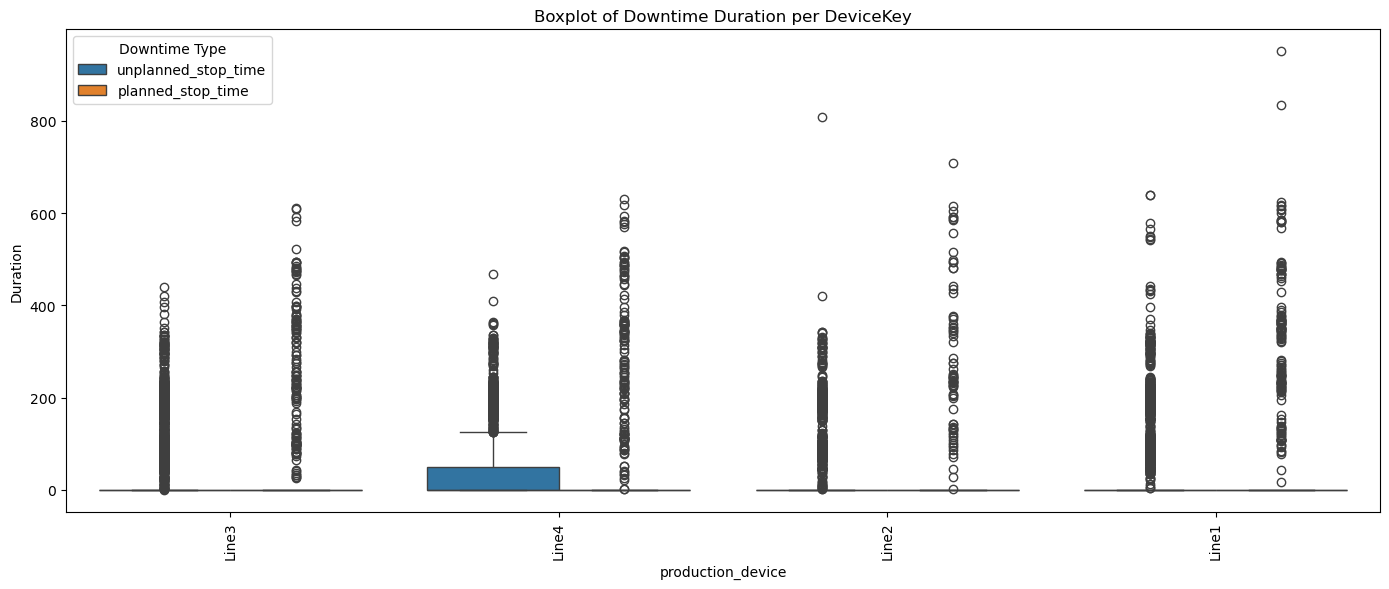

,production_device,unplanned_stop_time_mean,unplanned_stop_time_median,unplanned_stop_time_std,unplanned_stop_time_min,unplanned_stop_time_max,planned_stop_time_mean,planned_stop_time_median,planned_stop_time_std,planned_stop_time_min,planned_stop_time_max,unplanned_range,planned_range
0,Line1,35.888422,0.0,78.708419,0.0,640.208119,11.654235,0.0,67.257916,0.0,951.0,640.208119,951.0
1,Line2,33.305883,0.0,73.131087,0.0,809.164892,10.208797,0.0,61.483709,0.0,709.0,809.164892,709.0
2,Line3,32.050572,0.0,71.024479,0.0,439.728239,9.736699,0.0,56.692464,0.0,612.0,439.728239,612.0
3,Line4,41.848140,0.0,77.514593,0.0,468.443734,12.300688,0.0,65.586136,0.0,630.0,468.443734,630.0


In [22]:
# Grouping by 'deviceKey' and summarizing unplanned and planned stop times
downtime_summary = BeerBo_df.groupby('production_device')[['unplanned_stop_time', 'planned_stop_time']].agg(
    ['mean', 'median', 'std', 'min', 'max']
)

# Flatten multi-level columns
downtime_summary.columns = ['_'.join(col).strip() for col in downtime_summary.columns.values]
downtime_summary.reset_index(inplace=True)

# Calculate range
downtime_summary['unplanned_range'] = downtime_summary['unplanned_stop_time_max'] - downtime_summary['unplanned_stop_time_min']
downtime_summary['planned_range'] = downtime_summary['planned_stop_time_max'] - downtime_summary['planned_stop_time_min']

# Melt for boxplot
melted_df = BeerBo_df[['production_device', 'unplanned_stop_time', 'planned_stop_time']].melt(
    id_vars='production_device', var_name='Downtime Type', value_name='Duration'
)

# Set up the figure
plt.figure(figsize=(14, 6))
sns.boxplot(data=melted_df, x='production_device', y='Duration', hue='Downtime Type')
plt.title('Boxplot of Downtime Duration per DeviceKey')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

downtime_summary.head()


In [23]:
# Filter only rows with non-zero unplanned_stop_time
unplanned_df = BeerBo_df[BeerBo_df['unplanned_stop_time'] > 0]


In [24]:
# Count frequency
reason_counts = unplanned_df['process_state_reason_display_name'].value_counts().reset_index()
reason_counts.columns = ['process_state_reason_display_name', 'frequency']


/var/folders/1w/0smprttj4g3d6c5x6f1sqvc40000gn/T/ipykernel_59310/3133102981.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='process_state_reason_display_name', y='frequency', data=reason_counts.head(10), palette='viridis')


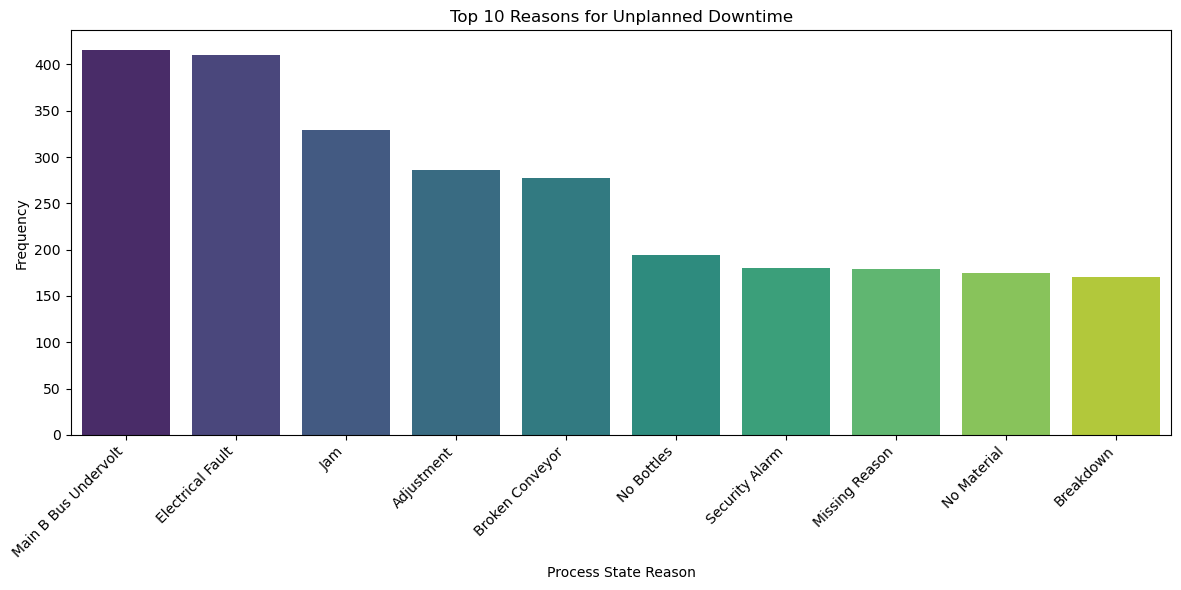

In [25]:
# Sort by frequency
reason_counts = reason_counts.sort_values(by='frequency', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='process_state_reason_display_name', y='frequency', data=reason_counts.head(10), palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Reasons for Unplanned Downtime')
plt.xlabel('Process State Reason')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


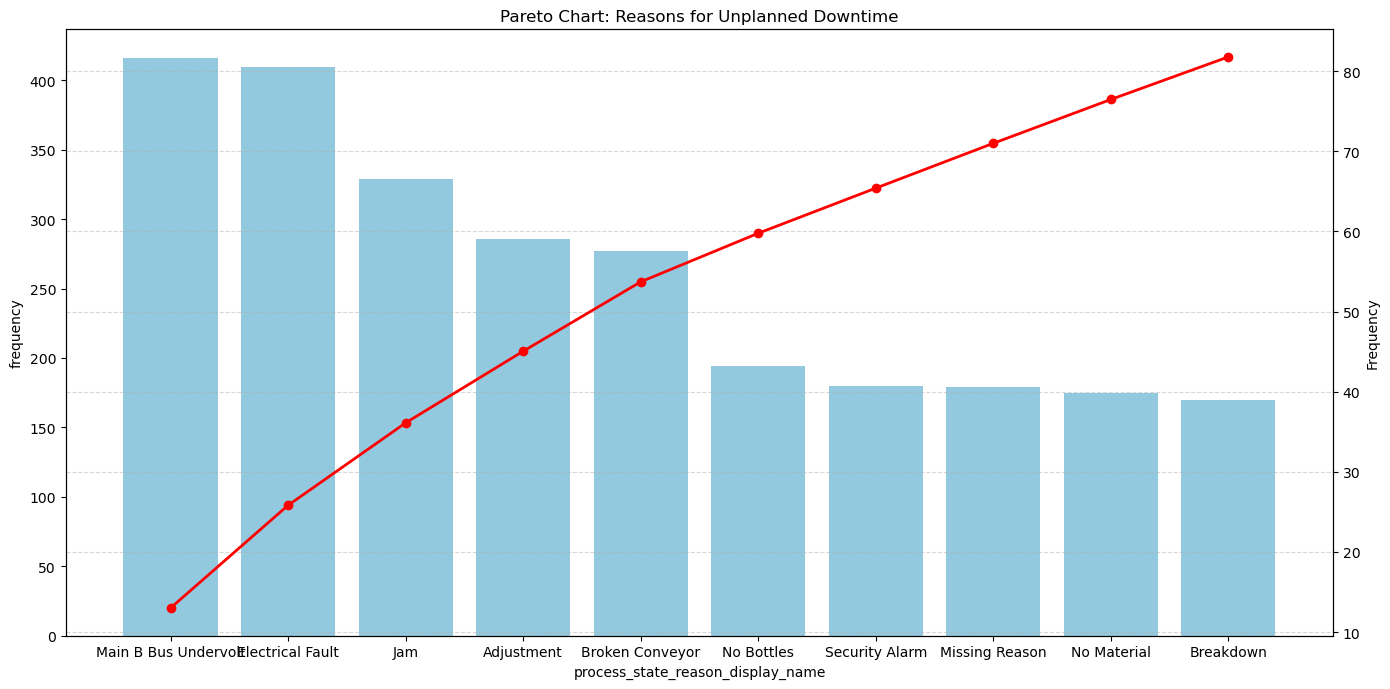

In [26]:
# Step 3: Sort by frequency and calculate cumulative %
reason_counts = reason_counts.sort_values(by='frequency', ascending=False)
reason_counts['cum_percentage'] = reason_counts['frequency'].cumsum() / reason_counts['frequency'].sum() * 100

# Step 4: Plot
plt.figure(figsize=(14, 7))

# Bar plot
sns.barplot(x='process_state_reason_display_name', y='frequency', data=reason_counts.head(10), color='skyblue')

# Cumulative % line (on secondary y-axis)
ax2 = plt.twinx()
ax2.plot(reason_counts['process_state_reason_display_name'].head(10),
         reason_counts['cum_percentage'].head(10), color='red', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Percentage (%)')

# Labels and styling
plt.xticks(rotation=45, ha='right')
plt.title('Pareto Chart: Reasons for Unplanned Downtime')
plt.xlabel('Process State Reason')
plt.ylabel('Frequency')
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [27]:
# Sum up the total good and reject counts
total_good_count = BeerBo_df['good_count'].sum()
total_reject_count = BeerBo_df['production_reject_count'].sum()

# Calculate reject rate
reject_rate = total_reject_count / (total_good_count + total_reject_count)
reject_rate_percentage = reject_rate * 100

print(f"Total Good Count: {total_good_count}")
print(f"Total Reject Count: {total_reject_count}")
print(f"Overall Reject Rate: {reject_rate_percentage:.2f}%")


Total Good Count: 2751958
Total Reject Count: 121933
Overall Reject Rate: 4.24%


/var/folders/1w/0smprttj4g3d6c5x6f1sqvc40000gn/T/ipykernel_59310/27875530.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reason_counts, x='reject_reason_display_name', y='count', palette='mako')


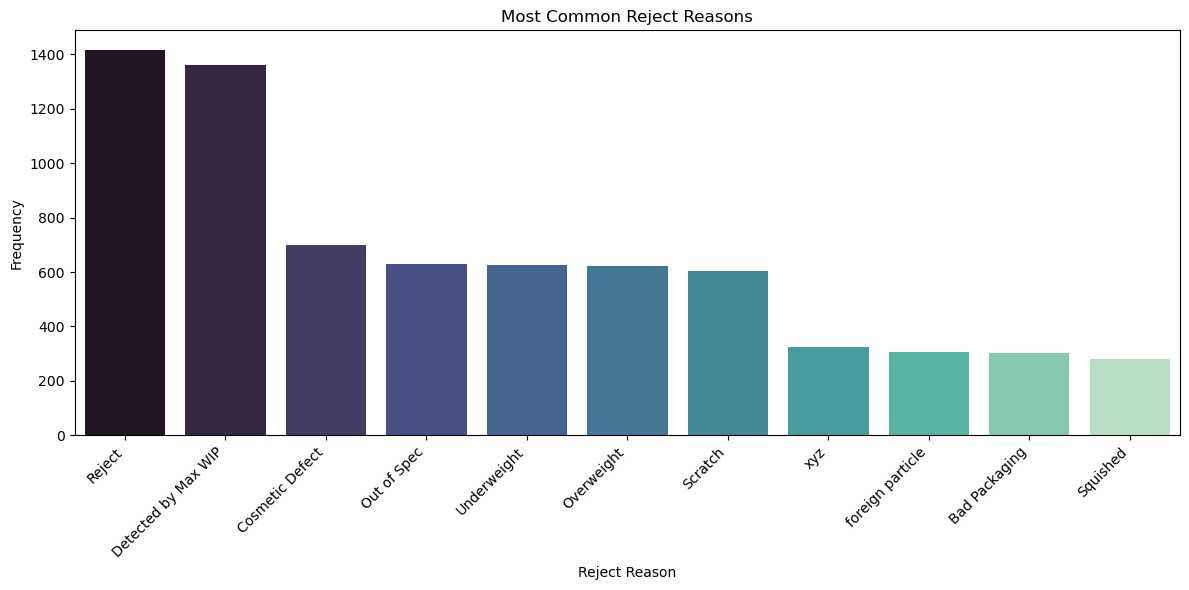

In [28]:
# Group by reject_reason_display_name and count
reason_counts = BeerBo_df['reject_reason_display_name'].value_counts().reset_index()
reason_counts.columns = ['reject_reason_display_name', 'count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=reason_counts, x='reject_reason_display_name', y='count', palette='mako')
plt.xticks(rotation=45, ha='right')
plt.title('Most Common Reject Reasons')
plt.xlabel('Reject Reason')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


/var/folders/1w/0smprttj4g3d6c5x6f1sqvc40000gn/T/ipykernel_59310/227151141.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=device_efficiency, x='production_device', y='good_per_hour', palette='viridis')


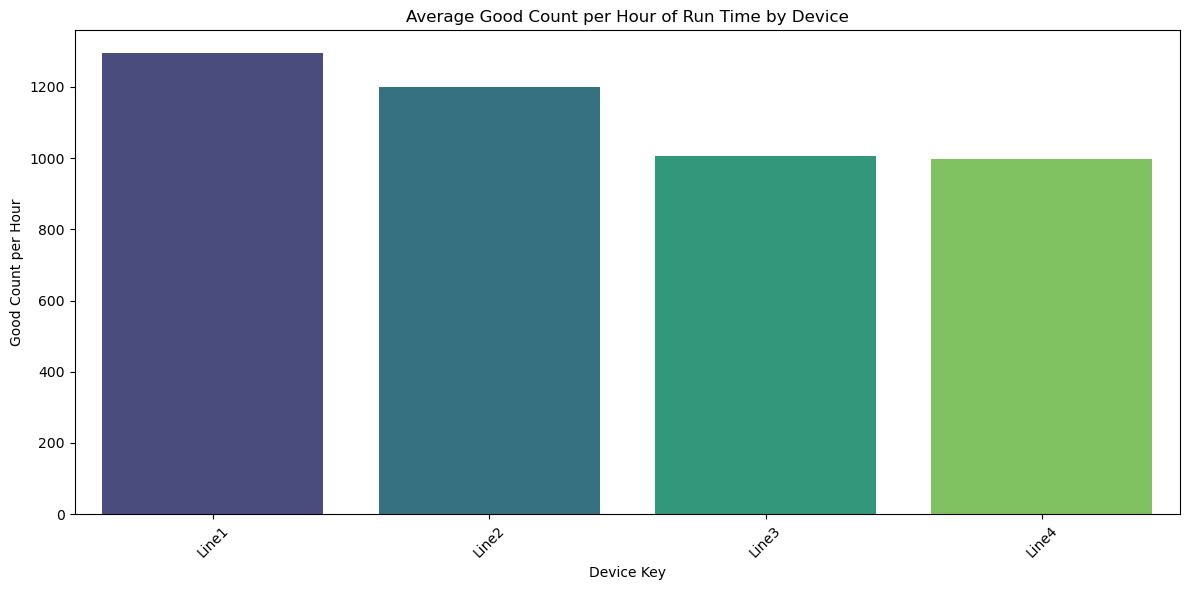

In [29]:
# Group by deviceKey and aggregate good_count and run_time
device_efficiency = BeerBo_df.groupby('production_device').agg({
    'good_count': 'sum',
    'run_time': 'sum'
}).reset_index()

# Calculate good count per hour
device_efficiency['good_per_hour'] = device_efficiency['good_count'] / (device_efficiency['run_time'] / 3600)

# Sort by performance
device_efficiency = device_efficiency.sort_values(by='good_per_hour', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=device_efficiency, x='production_device', y='good_per_hour', palette='viridis')
plt.title('Average Good Count per Hour of Run Time by Device')
plt.xlabel('Device Key')
plt.ylabel('Good Count per Hour')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Pearson Correlation: 0.01 (p-value: 0.9120)


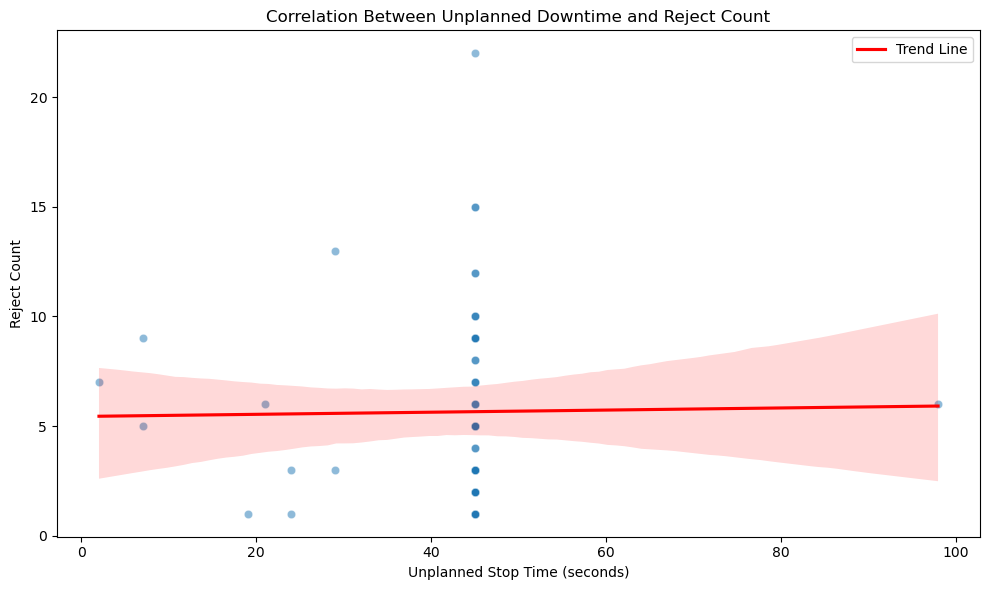

In [30]:
# Filter relevant rows
relevant_data = BeerBo_df[(BeerBo_df['unplanned_stop_time'] > 0) & (BeerBo_df['production_reject_count'] > 0)]

# Compute Pearson correlation
corr, p_value = pearsonr(relevant_data['unplanned_stop_time'], relevant_data['production_reject_count'])
print(f"Pearson Correlation: {corr:.2f} (p-value: {p_value:.4f})")

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=relevant_data, x='unplanned_stop_time', y='production_reject_count', alpha=0.5)
sns.regplot(data=relevant_data, x='unplanned_stop_time', y='production_reject_count', scatter=False, color='red', label='Trend Line')
plt.title('Correlation Between Unplanned Downtime and Reject Count')
plt.xlabel('Unplanned Stop Time (seconds)')
plt.ylabel('Reject Count')
plt.legend()
plt.tight_layout()
plt.show()

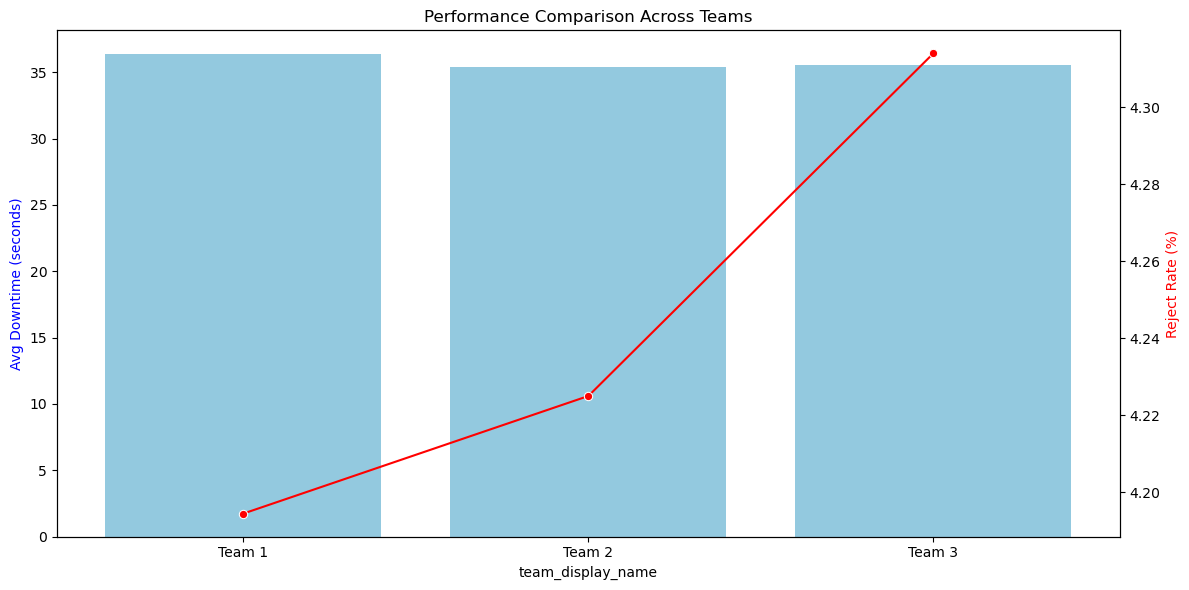

In [31]:
team_metrics = BeerBo_df.groupby('team_display_name').agg({
    'unplanned_stop_time': 'mean',
    'good_count': 'sum',
    'production_reject_count': 'sum'
}).reset_index()

team_metrics['reject_rate'] = (team_metrics['production_reject_count'] / 
                                (team_metrics['good_count'] + team_metrics['production_reject_count'])) * 100

team_metrics.rename(columns={
    'unplanned_stop_time': 'avg_unplanned_downtime'
}, inplace=True)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(data=team_metrics, x='team_display_name', y='avg_unplanned_downtime', color='skyblue', ax=ax1)
ax1.set_ylabel('Avg Downtime (seconds)', color='blue')
ax1.set_title('Performance Comparison Across Teams')

ax2 = ax1.twinx()
sns.lineplot(data=team_metrics, x='team_display_name', y='reject_rate', 
             marker='o', color='red', ax=ax2)
ax2.set_ylabel('Reject Rate (%)', color='red')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()